In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [187]:
df=pd.read_csv('F:\Data_Science\Drug\Drug.csv')

In [188]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [189]:
df.shape

(200, 6)

In [190]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

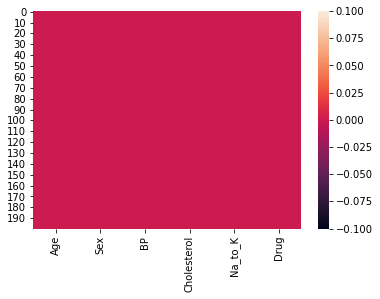

In [191]:
sns.heatmap(df.isnull())

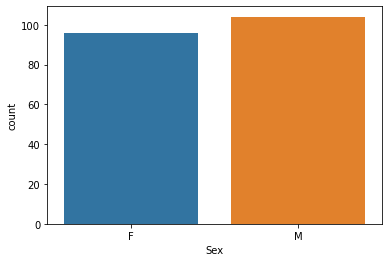

In [192]:
sns.countplot('Sex',data=df)

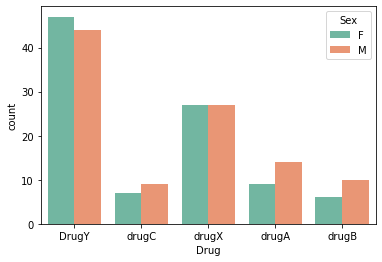

In [193]:
sns.countplot(x='Drug',hue='Sex',data=df,palette='Set2')

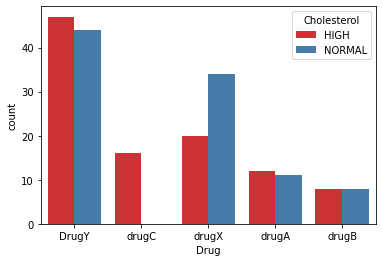

In [194]:
sns.countplot(x='Drug',hue='Cholesterol',data=df,palette='Set1')

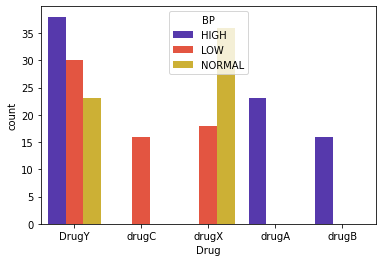

In [195]:
sns.countplot(x='Drug',hue='BP',data=df,palette='CMRmap')

In [196]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


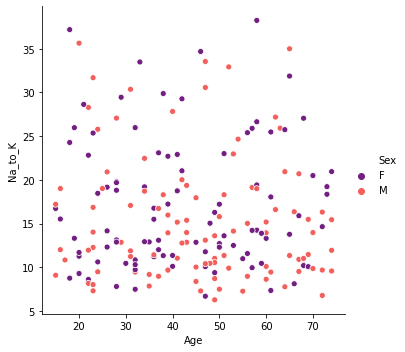

In [198]:
sns.relplot(x='Age',y='Na_to_K',data=df,hue='Sex',palette='magma')

In [199]:
from sklearn.preprocessing import LabelEncoder

In [200]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['BP']=le.fit_transform(df['BP'])
df['Cholesterol']=le.fit_transform(df['Cholesterol'])


In [201]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [202]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [203]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [204]:
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

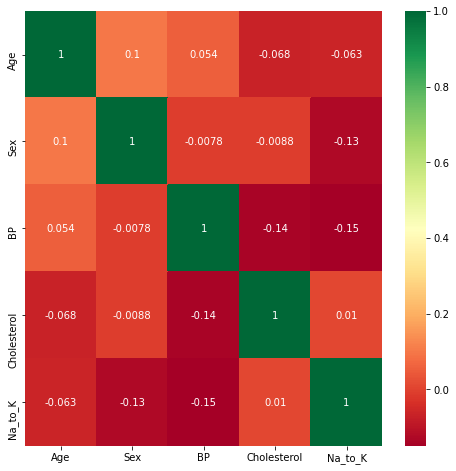

In [205]:
plt.figure(figsize=(8,8))
sns.heatmap(X.corr(),annot = True, cmap = "RdYlGn")

In [206]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

In [207]:
print(selection.feature_importances_)

[0.17381221 0.023972   0.23071969 0.05387822 0.51761789]


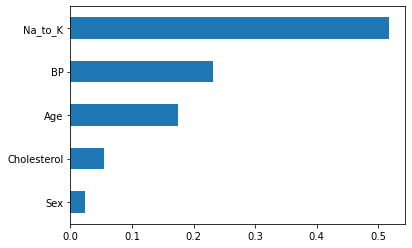

In [208]:
plt.figure(figsize=(6,4))
feat_imp=pd.Series(selection.feature_importances_,index=X.columns)
feat_imp.sort_values().plot(kind='barh')

In [209]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [211]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [212]:
svmodel=SVC()
svmodel.fit(X_train,y_train)
svmodel.score(X_test,y_test)

0.86

In [215]:
value=[]
algo=[]
def cross_val_score_model(model,name):
    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)
    cv_score=cross_val_score(model,X,y,cv=cv).mean()
    print('CV_Score' + ' '+ str(model) +': '+ str(cv_score))
    value.append(cv_score)
    algo.append(name)

cross_val_score_model(SVC(),'SVC')
cross_val_score_model(RandomForestClassifier(),'Random Forest Classifier')
cross_val_score_model(XGBClassifier(),'XGB Classifier')
cross_val_score_model(KNeighborsClassifier(),'KNeighbors Classifier')
cross_val_score_model(DecisionTreeClassifier(),'DecisionTree Classifier')
cross_val_score_model(LogisticRegression(solver='liblinear',multi_class='auto'),'Logistic Regression')

CV_Score SVC(): 0.6880000000000001
CV_Score RandomForestClassifier(): 0.9719999999999999
CV_Score XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None): 0.96
CV_Score KNeighborsClassifier(): 0.664
CV_Score DecisionTreeClassifier(): 0.9800000000000001
CV_Score LogisticRegression(solver='liblinear'): 0.812


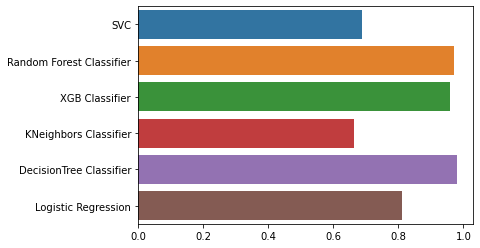

In [216]:
sns.barplot(x=value,y=algo)
plt.show()

In [217]:
model_params={
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[100,200,500,1000],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt'],
            'max_depth' : [5,10,15,20,25,30,35,40,45,50,70,100]
        }
    },
        'XGBoost':{
        'model':XGBClassifier(),
        'params':{
            'booster':['gbtree','gblinear'],
            'learning_rate':[0.05,0.1,0.15,0.20],
            'max_depth' : [5,10,15,20,25,30,35,40,45,50,75,100]
        }
    },
         'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion' : ['gini', 'entropy'],
            'splitter':['best','random'],
            'max_depth' : [5,10,15,20,25,30,35,40,45,50,75,100]
        }
    },
        'LogisticRegression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'penalty' : ['l1','l2','elasticnet'],
            'C':[1,10,50,100,200]
        }
    }
}

In [218]:
scores=[]
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)
for model_name, mp in model_params.items():
    random_clf=RandomizedSearchCV(mp['model'],mp['params'],cv=cv, return_train_score=False)
    random_clf.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':random_clf.best_score_,
        'best param':random_clf.best_params_,
        'best estimator':random_clf.best_estimator_
    })

ds=pd.DataFrame(scores,columns=['model','best_score','best param','best estimator'])
ds

[21:39:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only

,model,best_score,best param,best estimator
0,random_forest,0.984,"{'n_estimators': 1000, 'max_features': 'sqrt',...","(DecisionTreeClassifier(max_depth=40, max_feat..."
1,XGBoost,0.960,"{'max_depth': 25, 'learning_rate': 0.05, 'boos...","XGBClassifier(base_score=0.5, booster='gbtree'..."
2,DecisionTreeClassifier,0.980,"{'splitter': 'best', 'max_depth': 15, 'criteri...","DecisionTreeClassifier(criterion='entropy', ma..."
3,LogisticRegression,0.968,"{'penalty': 'l1', 'C': 10}","LogisticRegression(C=10, penalty='l1', solver=..."


In [219]:
def display_text_max_col_width(df, width):
    with pd.option_context('display.max_colwidth', width):
        print(df)

display_text_max_col_width(ds['best param'], 800)

0    {'n_estimators': 1000, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'gini'}
1                           {'max_depth': 25, 'learning_rate': 0.05, 'booster': 'gbtree'}
2                           {'splitter': 'best', 'max_depth': 15, 'criterion': 'entropy'}
3                                                              {'penalty': 'l1', 'C': 10}
Name: best param, dtype: object


In [220]:
cross_val_score_model(RandomForestClassifier(n_estimators=1000,criterion='gini',max_features= 'sqrt', max_depth= 40),'Random Forest Classifier_Best')
cross_val_score_model(XGBClassifier(max_depth= 25,learning_rate= 0.05, booster='gbtree'),'XGB Classifier_Best')
cross_val_score_model(DecisionTreeClassifier(max_depth=15,splitter='best', criterion='entropy'),'DecisionTreeClassifier_best')
cross_val_score_model(LogisticRegression(solver='liblinear',multi_class='auto',penalty='l1',C=10),'Logistic Regression_best')

CV_Score RandomForestClassifier(max_depth=40, max_features='sqrt', n_estimators=1000): 0.984
CV_Score XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=25,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None): 0.96
CV_Score DecisionTreeClassifier(criterion='entropy', max_depth=15): 0.9800000000000001
CV_Score LogisticRegression(C=10, penalty='l1', solver='liblinear'): 0.968


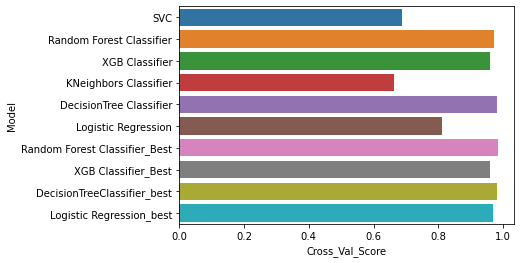

In [221]:
sns.barplot(x=value,y=algo)
plt.xlabel('Cross_Val_Score')
plt.ylabel('Model')
plt.show()

In [233]:
Best1=pd.Series(algo)
Best2=pd.Series(value)
pd.DataFrame({'Model':Best1,'CVScore':Best2})

,Model,CVScore
0,SVC,0.688
1,Random Forest Classifier,0.972
2,XGB Classifier,0.960
3,KNeighbors Classifier,0.664
4,DecisionTree Classifier,0.980
5,Logistic Regression,0.812
6,Random Forest Classifier_Best,0.984
7,XGB Classifier_Best,0.960
8,DecisionTreeClassifier_best,0.980
9,Logistic Regression_best,0.968


# BEST MODEL : RandomForestClassifier MODEL' WITH HYPER PARAMETER TUNING

In [225]:
RFClassifier_best=RandomForestClassifier(n_estimators=1000,criterion='gini',max_features= 'sqrt', max_depth= 40)
RFClassifier_best.fit(X_train,y_train)
RFClassifier_best.score(X_test,y_test)
                             

0.96

In [226]:
df.iloc[90]

Age                62
Sex                 1
BP                  2
Cholesterol         0
Na_to_K        16.594
Drug            DrugY
Name: 90, dtype: object

In [227]:
a=[[62,1,2,0,16.594]]
a=s.transform(a)
b=RFClassifier_best.predict(a)
b

array(['DrugY'], dtype=object)

In [239]:
from sklearn.metrics import accuracy_score
RFClassifier=RandomForestClassifier()
RFClassifier.fit(X_train,y_train)
rf_y_pred=RFClassifier.predict(X_test)
score1=accuracy_score(y_test,rf_y_pred)
score1

0.92

In [238]:
from sklearn.metrics import accuracy_score
RFClassifier_best=RandomForestClassifier(n_estimators=1000,criterion='gini',max_features= 'sqrt', max_depth= 40)
RFClassifier_best.fit(X_train,y_train)
rf_best_y_pred=RFClassifier_best.predict(X_test)
score_best=accuracy_score(y_test,rf_best_y_pred)
score_best

0.96

In [231]:
final=pd.DataFrame({'actual':y_test,
                   'predictions':rf_best_y_pred})  

In [232]:
final

,actual,predictions
59,DrugY,DrugY
5,drugX,drugX
20,DrugY,DrugY
198,drugX,drugX
52,DrugY,DrugY
19,DrugY,DrugY
162,drugX,drugX
55,drugC,drugC
69,DrugY,DrugY
2,drugC,drugC
